
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [ ]:
student_number = '400100962'
first_name = 'Parsa'
last_name = 'Hatami'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [27]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import random
from sklearn.manifold import TSNE

In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [3]:
spotify_df = pd.read_csv('/kaggle/input/spotify/spotify.csv')
selected_features = ['track_name', 'acousticness', 'danceability', 'energy', 
                     'instrumentalness', 'liveness', 'loudness', 'speechiness', 
                     'tempo', 'valence', 'duration_ms']

filtered_spotify_df = spotify_df[selected_features]
clean_spotify_df = filtered_spotify_df.dropna()
display(clean_spotify_df.head())

track_name  acousticness  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...        0.1020   
1                    Memories - Dillon Francis Remix        0.0724   
2                    All the Time - Don Diablo Remix        0.0794   
3                  Call You Mine - Keanu Silva Remix        0.0287   
4            Someone You Loved - Future Humans Remix        0.0803   

   danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0         0.748   0.916          0.000000    0.0653    -2.634       0.0583   
1         0.726   0.815          0.004210    0.3570    -4.969       0.0373   
2         0.675   0.931          0.000023    0.1100    -3.432       0.0742   
3         0.718   0.930          0.000009    0.2040    -3.778       0.1020   
4         0.650   0.833          0.000000    0.0833    -4.672       0.0359   

     tempo  valence  duration_ms  
0  122.036    0.518       194754  
1   99.972    0.693       162600  
2  124.008    0.613       176616  
3  121.956    0.277       169093  
4  123.976    0.725       189052

In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

Importance of Using a Standard Scaler

Standard scaling (also known as Z-score normalization) is a technique used to standardize the features of a dataset such that they have a mean of 0 and a standard deviation of 1. This is particularly important in clustering algorithms (like K-means) for the following reasons:

Equal Weightage: Without scaling, features with larger ranges can dominate the distance calculations, leading to biased results.

Improved Convergence: Many clustering algorithms converge faster and perform better when the data is scaled.

Meaningful Distances: In clustering, the distance metric (e.g., Euclidean distance) is used to assign clusters. If the features are not scaled, the resulting clusters may be misleading.

Potential Complications Without Scaling

Bias in Distance Calculation: Features with larger ranges can disproportionately influence the distance calculations, leading to incorrect clustering.

Poor Performance: The algorithm may converge to suboptimal clusters or take longer to converge.


In [4]:
def standardize_data(df, features):
    for feature in features:
        mean = df[feature].mean()
        std = df[feature].std()
        df[feature] = (df[feature] - mean) / std
    return df

numerical_features = selected_features[1:]  
standardized_spotify_df = standardize_data(clean_spotify_df.copy(), numerical_features)

display(standardized_spotify_df.head())

track_name  acousticness  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...     -0.333956   
1                    Memories - Dillon Francis Remix     -0.468719   
2                    All the Time - Don Diablo Remix     -0.436849   
3                  Call You Mine - Keanu Silva Remix     -0.667677   
4            Someone You Loved - Future Humans Remix     -0.432752   

   danceability    energy  instrumentalness  liveness  loudness  speechiness  \
0      0.642005  1.201649         -0.377979 -0.809234  1.367019    -0.481245   
1      0.490377  0.643379         -0.359205  1.081078  0.585728    -0.688536   
2      0.138875  1.284561         -0.377875 -0.519563  1.100008    -0.324296   
3      0.435239  1.279033         -0.377937  0.089588  0.984236    -0.049883   
4     -0.033430  0.742872         -0.377979 -0.692588  0.685104    -0.702356   

      tempo   valence  duration_ms  
0  0.042833  0.031928    -0.518794  
1 -0.777280  0.782513    -1.056159  
2  0.116131  0.439389    -0.821920  
3  0.039859 -1.001734    -0.947646  
4  0.114942  0.919763    -0.614087

# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

In [8]:
X = standardized_spotify_df[numerical_features].values

pca = PCA()
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance = explained_variance_ratio.cumsum()
num_components = len(cumulative_variance[cumulative_variance <= 0.95]) + 1

print(f"Explained variance ratio for each component: {explained_variance_ratio}")
print(f"Cumulative explained variance ratio: {cumulative_variance}")
print(f"Number of components to retain to cover 95% of variance: {num_components}")

pca = PCA(n_components=num_components)
X_reduced = pca.fit_transform(X)

reduced_df = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(num_components)])
display(reduced_df.head())

Explained variance ratio for each component: [0.21524724 0.15451795 0.11230178 0.09924838 0.09811307 0.09694317
 0.0843699  0.06191423 0.05498202 0.02236227]
Cumulative explained variance ratio: [0.21524724 0.36976519 0.48206697 0.58131534 0.67942841 0.77637158
 0.86074148 0.92265571 0.97763773 1.        ]
Number of components to retain to cover 95% of variance: 9


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.550064 -0.655463 -0.456189 -1.100456 -0.566805 -0.257647 -0.227100   
1 -1.092463 -0.895239 -0.047603  0.327093 -0.351916 -1.451858  0.894278   
2 -1.630076 -0.614518 -0.086739 -0.937306 -0.555300 -0.266366  0.157835   
3 -1.598149 -0.062884  0.402044 -0.807952  0.035427 -0.868321 -0.590987   
4 -1.091273 -0.589457 -0.416789 -0.812184 -0.876817  0.028364  0.533991   

        PC8       PC9  
0  0.201723 -0.563697  
1 -0.417770  0.101721  
2  0.243211  0.062644  
3 -0.422009 -0.486708  
4  0.094954  0.355248

# Clustering

Implement K-means for clustering from scratch.

/tmp/ipykernel_33/1541726973.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_spotify_df['cluster'] = labels


track_name  acousticness  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...        0.1020   
1                    Memories - Dillon Francis Remix        0.0724   
2                    All the Time - Don Diablo Remix        0.0794   
3                  Call You Mine - Keanu Silva Remix        0.0287   
4            Someone You Loved - Future Humans Remix        0.0803   

   danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0         0.748   0.916          0.000000    0.0653    -2.634       0.0583   
1         0.726   0.815          0.004210    0.3570    -4.969       0.0373   
2         0.675   0.931          0.000023    0.1100    -3.432       0.0742   
3         0.718   0.930          0.000009    0.2040    -3.778       0.1020   
4         0.650   0.833          0.000000    0.0833    -4.672       0.0359   

     tempo  valence  duration_ms  cluster  
0  122.036    0.518       194754        0  
1   99.972    0.693       162600        0  
2  124.008    0.613       176616        0  
3  121.956    0.277       169093        4  
4  123.976    0.725       189052        0

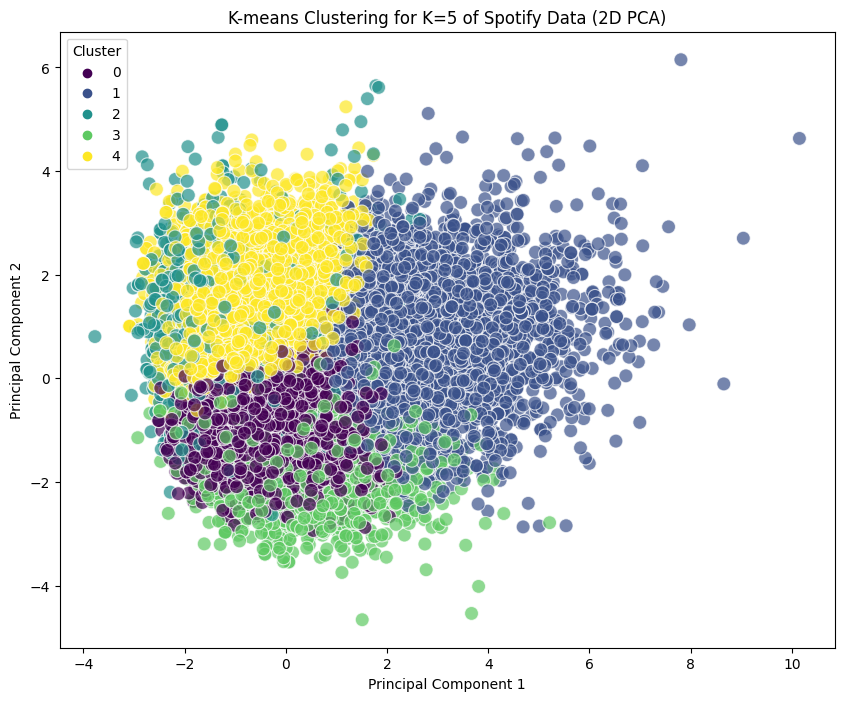

In [17]:
X = standardized_spotify_df[numerical_features].values

def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def update_centroids(X, labels, k):
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def k_means(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        old_centroids = centroids
        labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, labels, k)
        if np.all(np.abs(centroids - old_centroids) < tol):
            break
    return centroids, labels

k = 5  
centroids, labels = k_means(X, k)

clean_spotify_df['cluster'] = labels

display(clean_spotify_df.head())

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clustered data
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="viridis", s=100, alpha=0.7)
plt.title('K-means Clustering for K=5 of Spotify Data (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

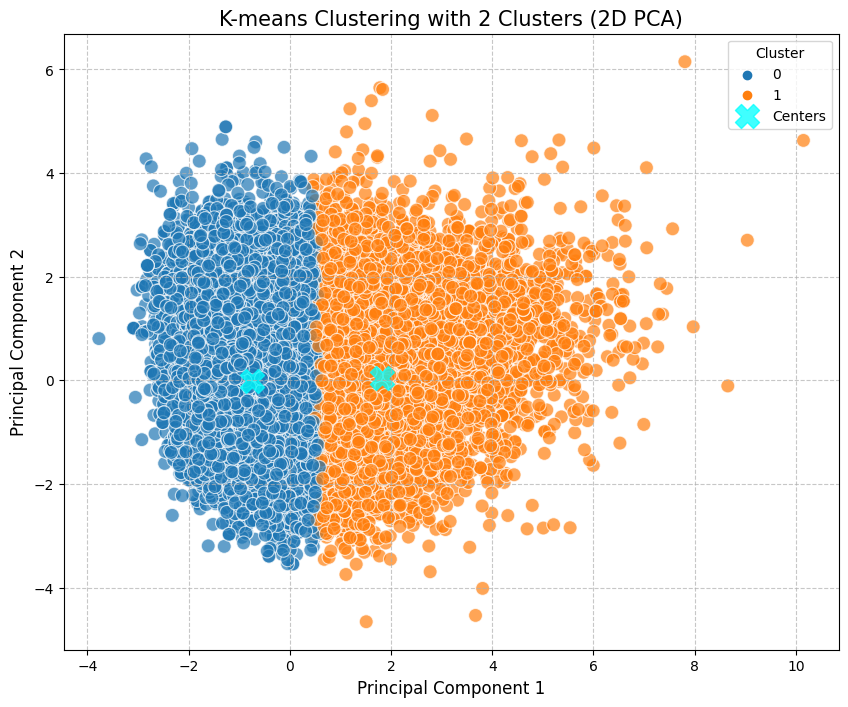

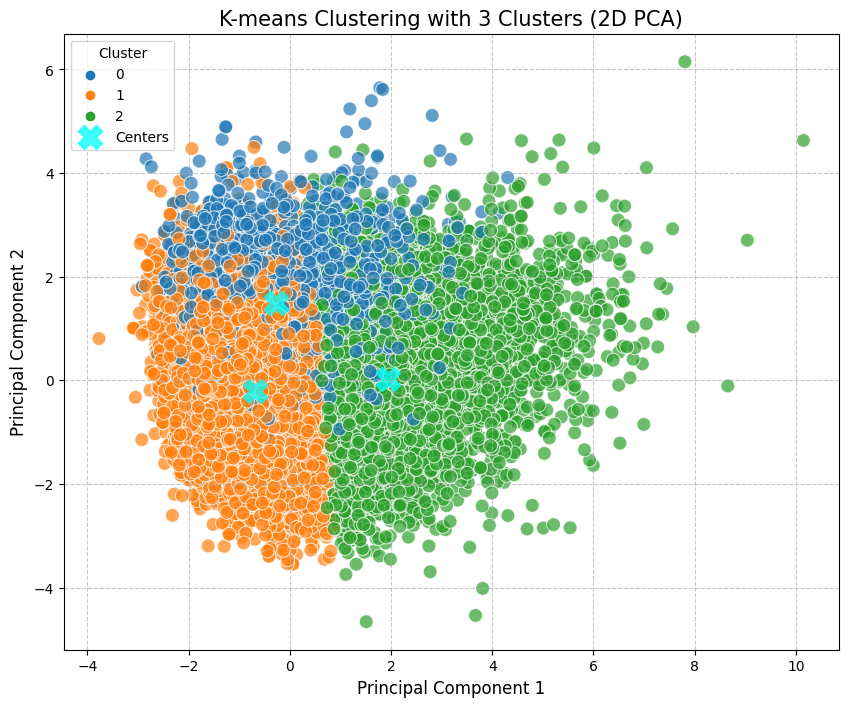

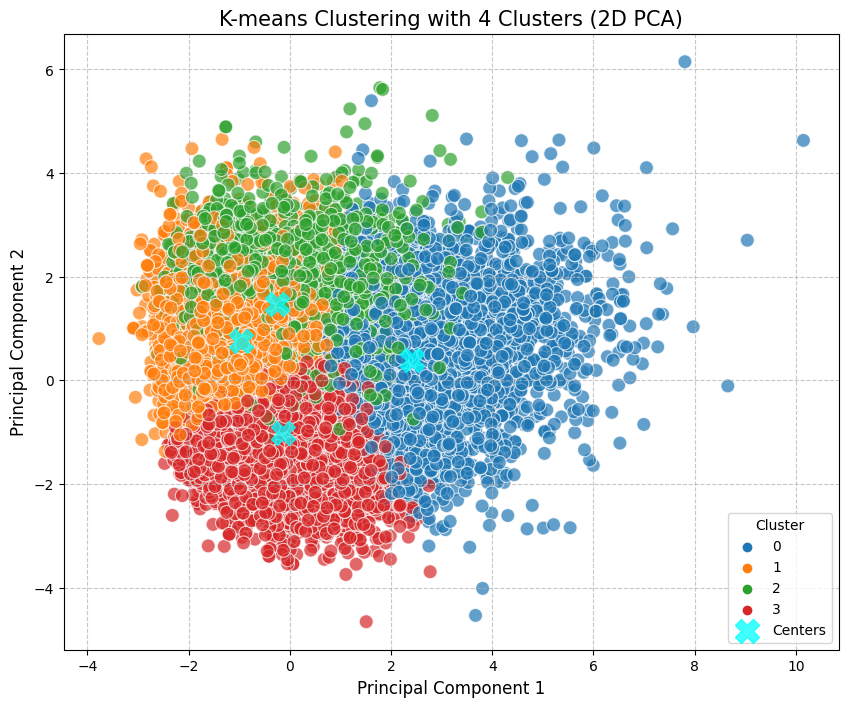

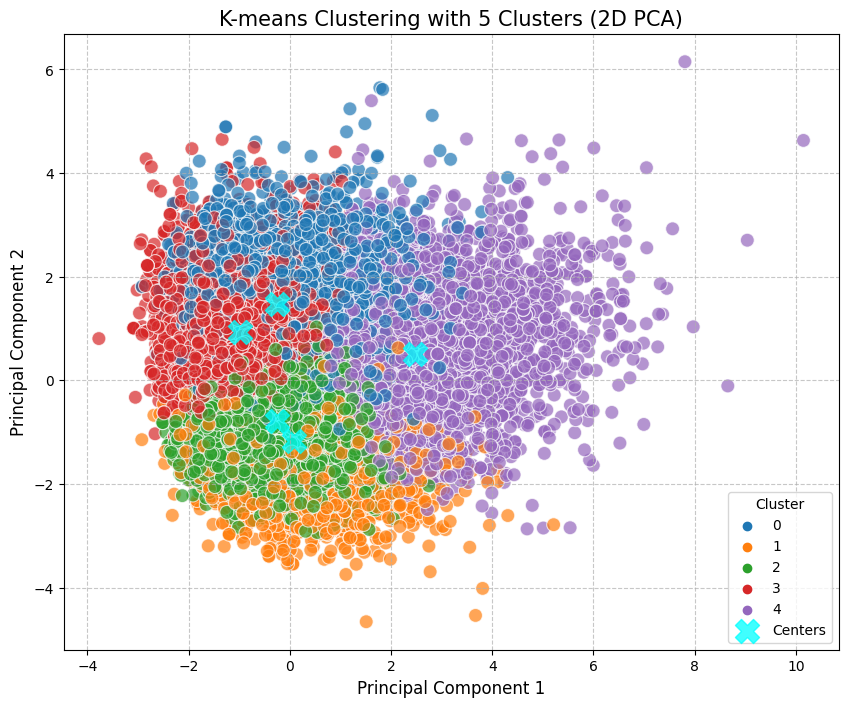

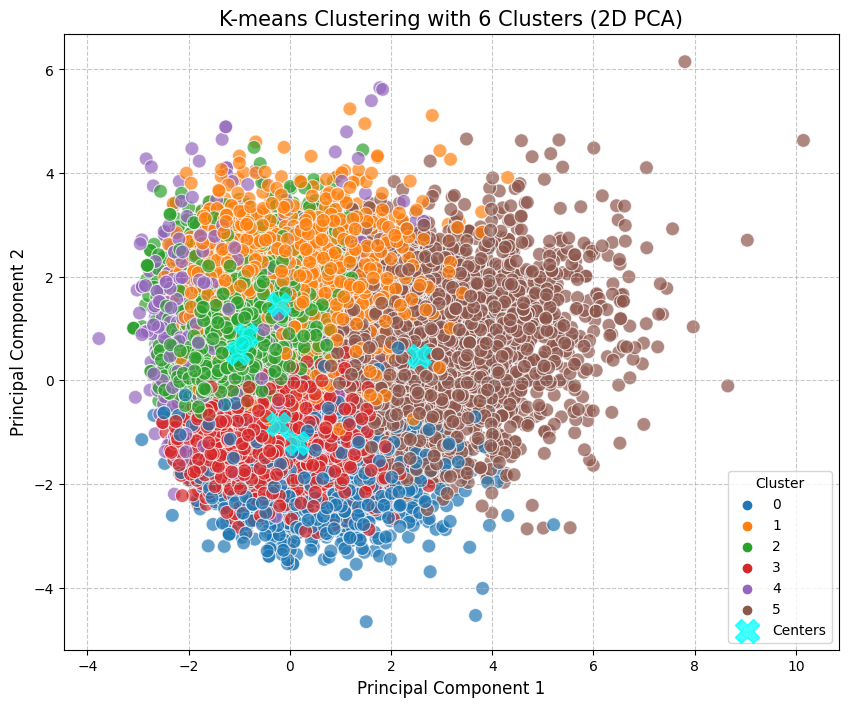

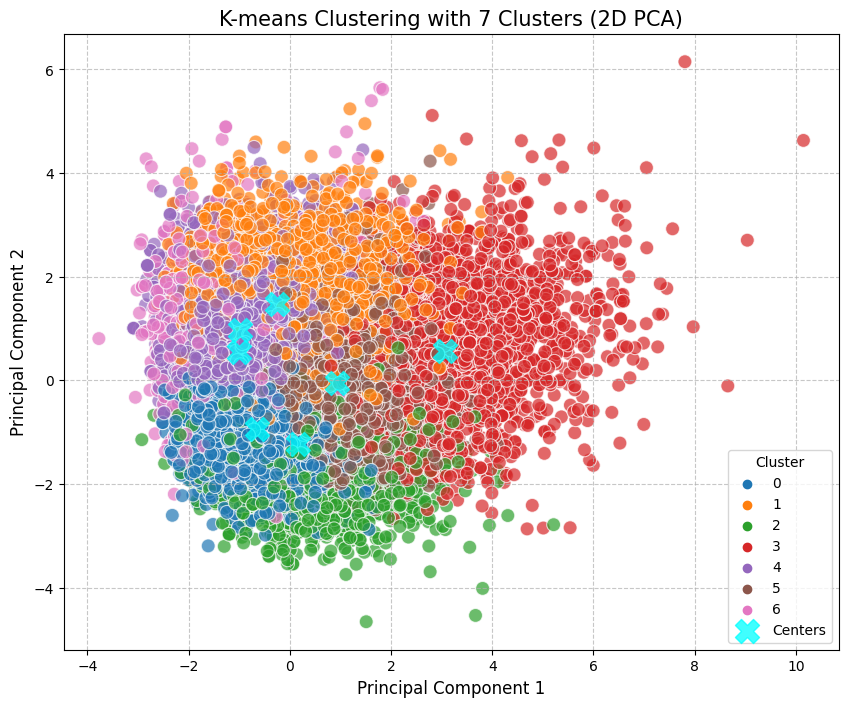

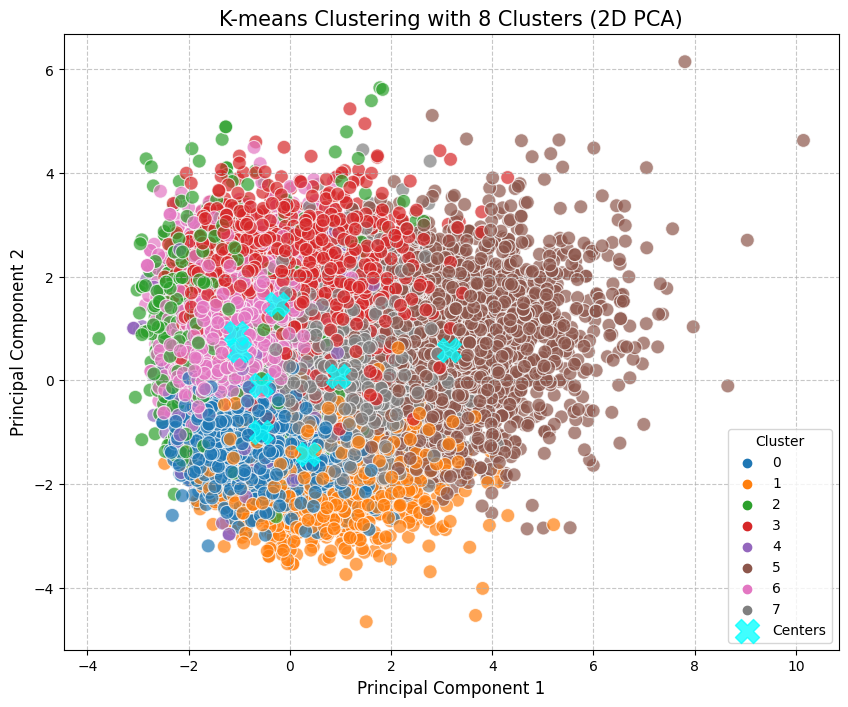

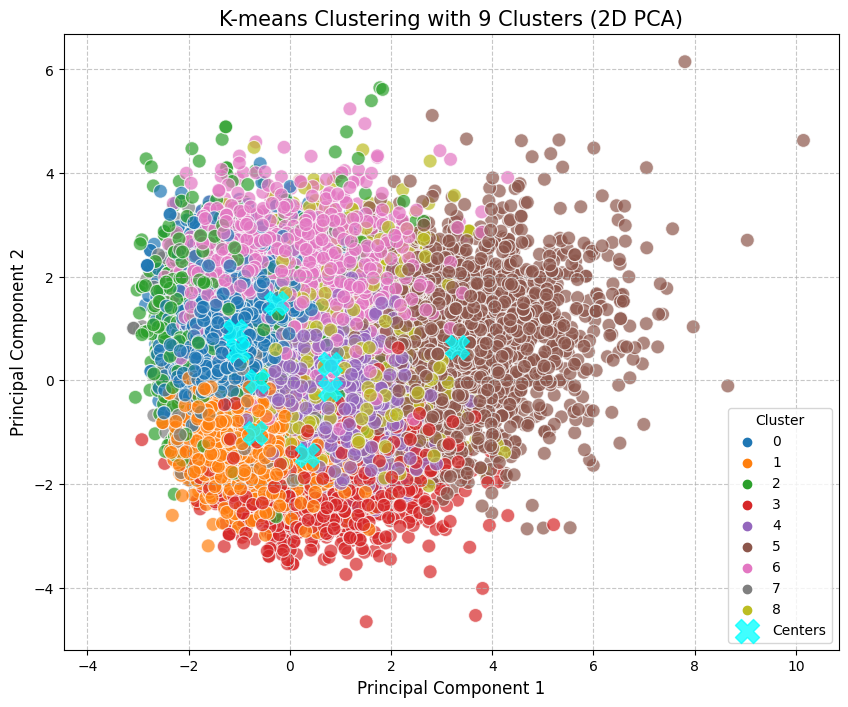

In [34]:
def plot_clusters(X_pca, labels, centroids, n_clusters):
    plt.figure(figsize=(10, 8))
    palette = sns.color_palette('tab10', n_clusters)  # Using 'tab10' for distinct colors
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette=palette, s=100, alpha=0.7, legend='full')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='cyan', s=300, alpha=0.75, marker='X', label='Centers')    
    plt.title(f'K-means Clustering with {n_clusters} Clusters (2D PCA)', fontsize=15)
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    plt.legend(title='Cluster')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

for n_clusters in range(2, 10):
    centroids, labels = k_means(X, n_clusters)
    plot_clusters(X_pca, labels, pca.transform(centroids), n_clusters)

The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

For n_clusters = 2, WSS = 283292.8232448645, Silhouette score = 0.17673982491975807
For n_clusters = 3, WSS = 255703.9377315951, Silhouette score = 0.12600514045988953
For n_clusters = 4, WSS = 236762.5769354559, Silhouette score = 0.1254423125110442
For n_clusters = 5, WSS = 216293.9257861975, Silhouette score = 0.13456690499726204
For n_clusters = 6, WSS = 203500.75896748836, Silhouette score = 0.13687722412570177
For n_clusters = 7, WSS = 195773.0857092019, Silhouette score = 0.14065936348593702
For n_clusters = 8, WSS = 185853.38811941404, Silhouette score = 0.12081101055886813
For n_clusters = 9, WSS = 178920.58151131865, Silhouette score = 0.12961160999778368
For n_clusters = 10, WSS = 175450.16948339008, Silhouette score = 0.10710282757916385


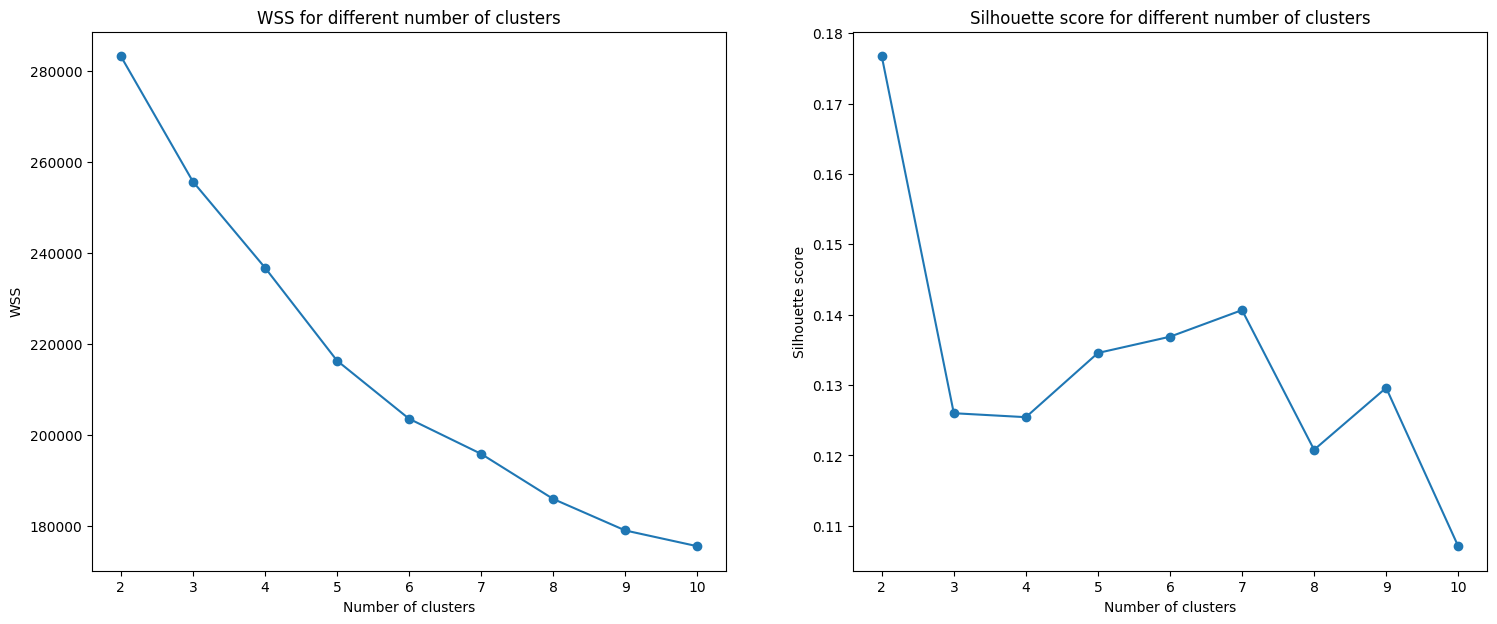

In [35]:
def calculate_wss(X, labels, centroids):
    wss = 0
    for i in range(centroids.shape[0]):
        cluster_points = X[labels == i]
        wss += np.sum((cluster_points - centroids[i]) ** 2)
    return wss

wss_scores = []
silhouette_scores = []

range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    centroids, labels = k_means(X, n_clusters)
    wss = calculate_wss(X, labels, centroids)
    silhouette_avg = silhouette_score(X, labels)
    wss_scores.append(wss)
    silhouette_scores.append(silhouette_avg)
    print(f'For n_clusters = {n_clusters}, WSS = {wss}, Silhouette score = {silhouette_avg}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

ax1.plot(range_n_clusters, wss_scores, marker='o')
ax1.set_title('WSS for different number of clusters')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WSS')

ax2.plot(range_n_clusters, silhouette_scores, marker='o')
ax2.set_title('Silhouette score for different number of clusters')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette score')

plt.show()

# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [40]:
def sample_check(df, labels, k):
    for cluster in range(k):
        cluster_data = df[df['cluster'] == cluster]
        if len(cluster_data) > 1:
            sample_songs = cluster_data.sample(2, random_state=42)
            song_1, song_2 = sample_songs.iloc[0], sample_songs.iloc[1]
            dist = np.linalg.norm(song_1[numerical_features] - song_2[numerical_features])
            print(f"Cluster {cluster}:")
            print(f"Song 1: {song_1['track_name']}")
            print(f"Song 2: {song_2['track_name']}")
            print(f"Distance: {dist:.4f}\n")
        else:
            print(f"Cluster {cluster} has less than 2 songs.\n")

range_n_clusters = range(2, 10)

for k in range_n_clusters:
    centroids, labels = k_means(X, k)

    clean_spotify_df['cluster'] = labels

    print(f"Sample check for k={k}:")
    sample_check(clean_spotify_df, labels, k)


/tmp/ipykernel_33/3523874210.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_spotify_df['cluster'] = labels


Sample check for k=2:
Cluster 0:
Song 1: Yellow Brick Road
Song 2: Ich pass auf
Distance: 66490.0000

Cluster 1:
Song 1: Treasure of My Heart
Song 2: My Way - Tiësto Remix
Distance: 22733.0002



/tmp/ipykernel_33/3523874210.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_spotify_df['cluster'] = labels


Sample check for k=3:
Cluster 0:
Song 1: N.M.
Song 2: Brown Eyed Girl
Distance: 50949.0038

Cluster 1:
Song 1: Dear to Me
Song 2: Never Be Alone (feat. Aloe Blacc)
Distance: 62809.0006

Cluster 2:
Song 1: Best Days
Song 2: Caffeine
Distance: 45497.0011



/tmp/ipykernel_33/3523874210.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_spotify_df['cluster'] = labels


Sample check for k=4:
Cluster 0:
Song 1: Keep Ya Head Up
Song 2: Visit By Cap Kendricks
Distance: 68267.0604

Cluster 1:
Song 1: Call You Home - Faul & Wad Ad Remix
Song 2: All Night Long - Krutz Remix
Distance: 38916.0057

Cluster 2:
Song 1: Mentira (feat. Ely Guerra)
Song 2: Scared to Be Lonely
Distance: 40230.0009

Cluster 3:
Song 1: Si ella quisiera
Song 2: Same Old Love
Distance: 16919.0023



/tmp/ipykernel_33/3523874210.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_spotify_df['cluster'] = labels


Sample check for k=5:
Cluster 0:
Song 1: The Way You Make Me Feel - 2012 Remaster
Song 2: Get Buck
Distance: 43627.0165

Cluster 1:
Song 1: What About The Love
Song 2: Youth (Qrion Remix) [feat. Satica]
Distance: 75524.0064

Cluster 2:
Song 1: Stompin' to My Beat
Song 2: Khokana
Distance: 290600.0001

Cluster 3:
Song 1: Mi Vicio
Song 2: SICKO MODE
Distance: 90778.0310

Cluster 4:
Song 1: Fire Away
Song 2: Uma Dose
Distance: 59439.0025



/tmp/ipykernel_33/3523874210.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_spotify_df['cluster'] = labels


Sample check for k=6:
Cluster 0:
Song 1: Saving All My Love for You
Song 2: Gravity
Distance: 35757.0010

Cluster 1:
Song 1: V.I.P. (feat. The Product G&B)
Song 2: My Boo
Distance: 40844.0069

Cluster 2:
Song 1: Something Like That
Song 2: SMASH! - Edit
Distance: 49840.0001

Cluster 3:
Song 1: Coming Back
Song 2: Work - R3hab Remix
Distance: 7350.0001

Cluster 4:
Song 1: No Regrets (feat. Don Toliver)
Song 2: Selfish - DVLM & Brennan Heart VIP Remix
Distance: 27079.0034

Cluster 5:
Song 1: Jumpman
Song 2: NASA
Distance: 23879.0941



/tmp/ipykernel_33/3523874210.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_spotify_df['cluster'] = labels


Sample check for k=7:
Cluster 0:
Song 1: Distance
Song 2: Divinity - filous Remix
Distance: 71814.0254

Cluster 1:
Song 1: Don't Stop The Groove
Song 2: Gravity
Distance: 787.0680

Cluster 2:
Song 1: Mister Dardy
Song 2: Quedo Envuelto
Distance: 22011.0191

Cluster 3:
Song 1: Five More Hours - Deorro x Chris Brown
Song 2: Karate
Distance: 1975.0001

Cluster 4:
Song 1: Change
Song 2: Lifetime
Distance: 61894.0055

Cluster 5:
Song 1: X
Song 2: bum boy (feat. Orla Engstrøm)
Distance: 74982.0362

Cluster 6:
Song 1: Breathe
Song 2: F*CK - Dimitri Vegas & Like Mike Edit
Distance: 37243.0010



/tmp/ipykernel_33/3523874210.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_spotify_df['cluster'] = labels


Sample check for k=8:
Cluster 0:
Song 1: You Know You Like It
Song 2: Speed
Distance: 7917.0432

Cluster 1:
Song 1: Summertime (feat. August Alsina)
Song 2: Dare Me
Distance: 9500.0888

Cluster 2:
Song 1: Are You Gonna Go My Way
Song 2: I Can't Hold Back
Distance: 26414.0038

Cluster 3:
Song 1: Barefoot In The Park
Song 2: Where Is My Mind?
Distance: 577.8764

Cluster 4:
Song 1: This Is What You Came For
Song 2: Hate To Say I Told You So
Distance: 21467.0034

Cluster 5:
Song 1: Vento sulla luna (feat. Rkomi)
Song 2: Deixe-Me Ir - LIVA Remix
Distance: 53496.0150

Cluster 6:
Song 1: Good Looking
Song 2: Headless Hobby Horse - Teamworx Remix
Distance: 70640.0087

Cluster 7:
Song 1: Ta Papia
Song 2: How We Feelin
Distance: 44150.0086

Sample check for k=9:
Cluster 0:
Song 1: Tutankhamun - Original Mix
Song 2: No Decoder
Distance: 51549.0001

Cluster 1:
Song 1: With You
Song 2: Es geht voran
Distance: 41724.0039

Cluster 2:
Song 1: Me Gustas Tú
Song 2: Reminiscing - Remastered
Distance: 123

/tmp/ipykernel_33/3523874210.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_spotify_df['cluster'] = labels


Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

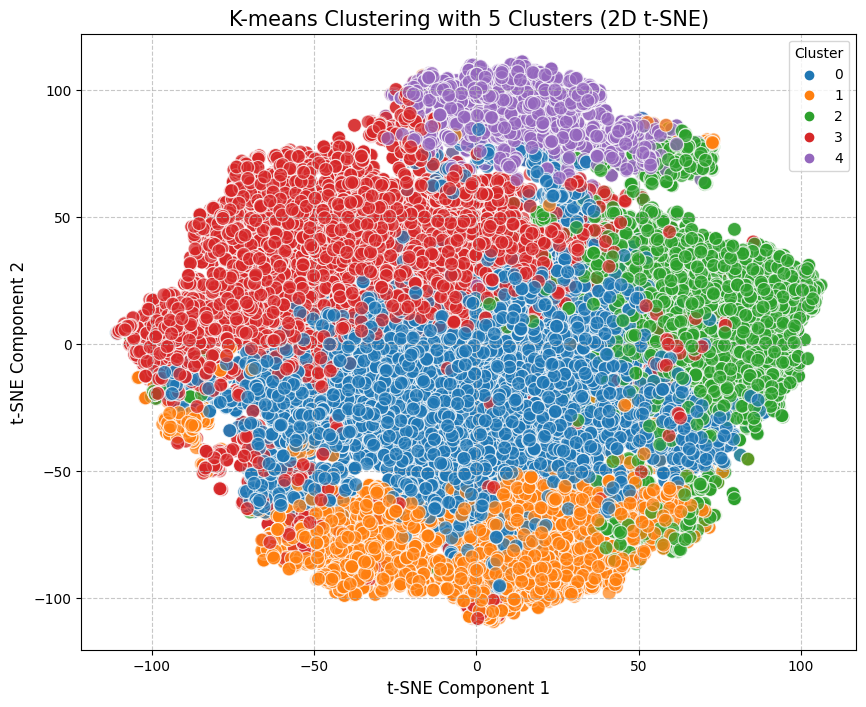

In [29]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(reduced_df)

plt.figure(figsize=(10, 8))
palette = sns.color_palette('tab10', k) 
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette=palette, s=100, alpha=0.7, legend='full')

plt.title(f'K-means Clustering with {k} Clusters (2D t-SNE)', fontsize=15)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

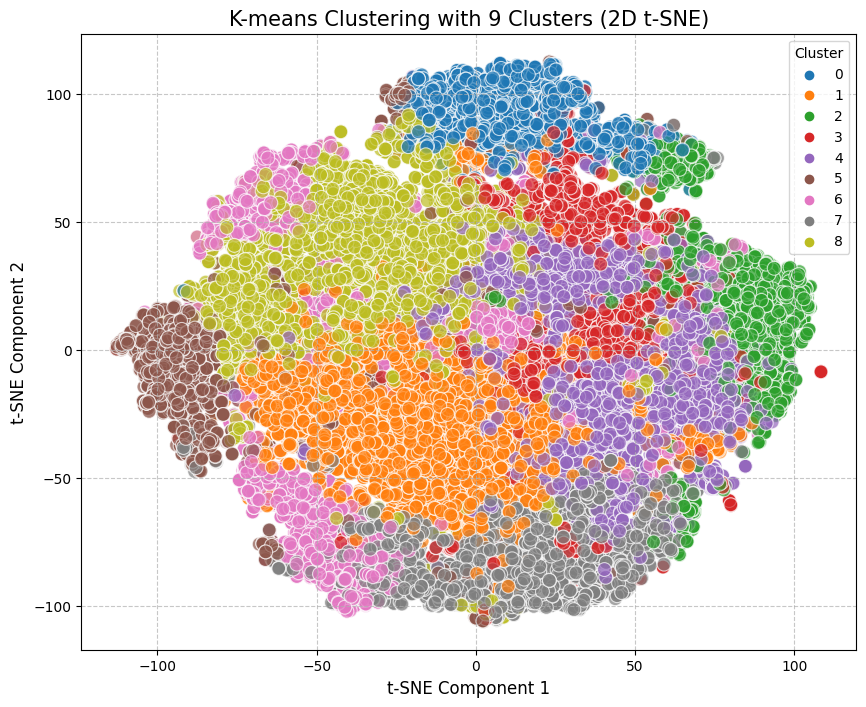

In [41]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(reduced_df)

plt.figure(figsize=(10, 8))
palette = sns.color_palette('tab10', k) 
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette=palette, s=100, alpha=0.7, legend='full')

plt.title(f'K-means Clustering with {k} Clusters (2D t-SNE)', fontsize=15)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()